In [19]:
# Data Analysis
import pandas as pd
import numpy as np
import random

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('vegafusion')

# Data Loading
listings = pd.read_csv("airbnb_listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077.0,https://www.airbnb.com/rooms/44077,2.022090e+13,12/09/2022,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156.0,https://www.airbnb.com/rooms/85156,2.022090e+13,12/09/2022,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889.0,https://www.airbnb.com/rooms/159889,2.022090e+13,12/09/2022,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809.0,https://www.airbnb.com/rooms/162809,2.022090e+13,11/09/2022,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828.0,https://www.airbnb.com/rooms/165828,2.022090e+13,11/09/2022,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [20]:
print("Welcome to your Airbnb Assistant")
print("First, I would like to know what kind of airbnb you are looking for?\n")
#first = input("What is your query related to:")
print("Options\n",
      "1. Price\n", #This one will show you where the highest and lowest price are located
      "2. Superhosts location\n", #This will show you where the superhost properties are
      "3. Rating\n", #This will show you where are the best rated listings
      "4. Amenities\n", #Specify essential amenities, wifi, kitchen and washing machine
      "5. Availability\n", #this will show you if you
)



def price_max (listings):
    ind_max = df.idxmax().iloc[0]
    max =listings["price"].max()
    

Welcome to your Airbnb Assistant
First, I would like to know what kind of airbnb you are looking for?

Options
 1. Price
 2. Superhosts location
 3. Rating
 4. Amenities
 5. Availability



# **PART I. Airbnb trends**

## **1. What are the price categories for Airbnb?**

The column price does not have numerical values only. It is necessary to delete any other character to be completely numerical.
The average price for an airbnb is $ 182.33 approximately, but the extremely high standard deviation value revealed there could be outliers that could be affecting the statistical analysis

In [21]:
listings["price"] = listings["price"].str.replace("$", "")
listings["price"] = listings["price"].str.replace(",", "")
listings["price"] = pd.to_numeric(listings["price"])
listings["price"] .describe()

count     7566.000000
mean       182.327953
std       1170.750214
min         10.000000
25%         65.000000
50%        105.000000
75%        192.750000
max      99149.000000
Name: price, dtype: float64

After cleaning the "price" variable, outliers has been detected. There are airbnb which value is almost $ 10,000.00 which is affecting the statistical analysis.

In [22]:
Price = listings[['price']]

listings.boxplot("price", 
                capwidths=0.2, notch=False,
                color="#E50000",figsize=[4,4])
plt.title("Price")

Text(0.5, 1.0, 'Price')

Considering minimum, maximum and average values, nine intervals has been created to obtain the distribution of airbnb prices.

Noticeably, more than 50 % of airbnb prices are close and below mean. More expensive airbnb represent a small part of the whole dataset.

price_interval
(30.0, 60.0]         1497
(60.0, 90.0]         1438
(90.0, 120.0]        1097
(180.0, 250.0]        912
(120.0, 150.0]        766
(300.0, 500.0]        513
(150.0, 180.0]        495
(250.0, 300.0]        321
(9.999, 30.0]         251
(500.0, 700.0]        114
(1500.0, 15000.0]      78
(700.0, 1200.0]        75
(1200.0, 1500.0]        8
Name: count, dtype: int64


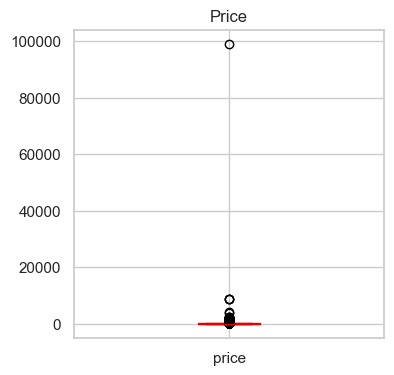

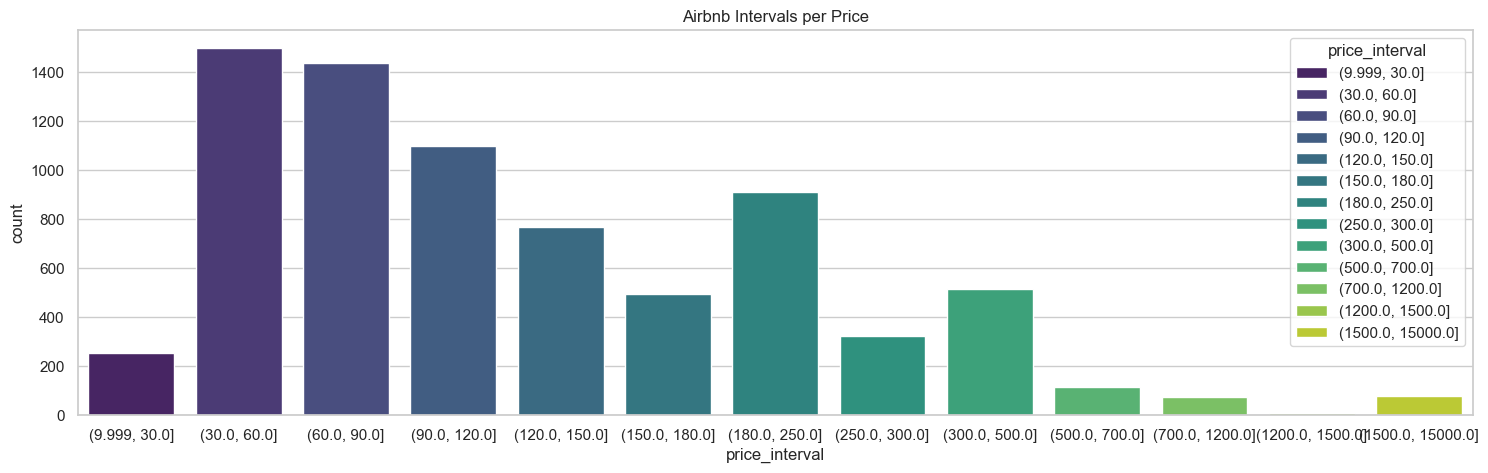

In [23]:
# Bins of airbnb value in USD
price_bins = [10,30,60,90,120,150,180,250, 300,500,700,1200,1500,15000]
# Price intervals
listings['price_interval'] = pd.cut(listings['price'], bins=price_bins, include_lowest=True)
print(listings['price_interval'].value_counts())

# Bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
sns.countplot(x='price_interval', data=listings, hue='price_interval', palette='viridis', dodge=False)
plt.title("Airbnb Intervals per Price")
plt.show()

## **2. Can I be hosted by an Airbnb superhost for more or less than $1,200.00 ?**

Could it be more expensive to be hosted by a superhost than a non-superhost? Is there any noticeable price difference? 

First graph represents Airbnb prices being more than $ 1,200 which are considered outliers, host will be superhost and it will be considered from 6 to 50 times more expensive than the average Airbnb price.

Second graph represents the prices comparison without outliers, whether the host is a superhost or not. It reveals that, actually, it is cheaper to be hosted by a superhost as a non-superhost airbnb price could even be $ 600 more expensive.

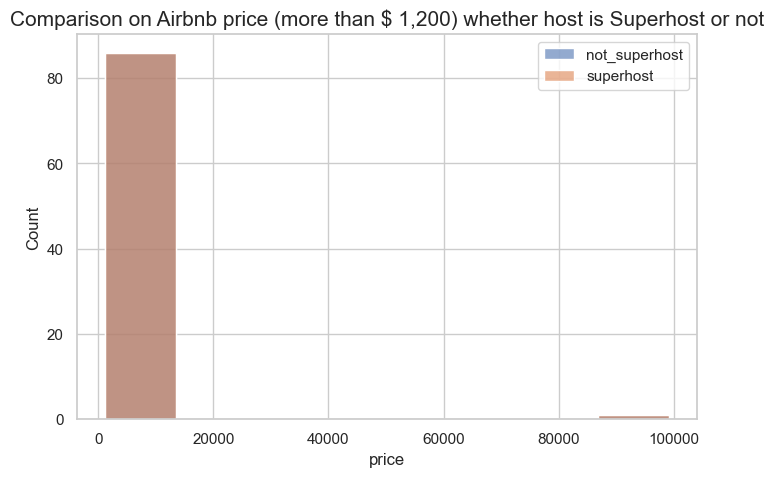

In [24]:
new = listings.loc[listings['price']>1200, 'price']

fig = plt.figure(figsize=(8,5))
sns.histplot(data =listings[listings['host_is_superhost'] =='f'] ,  x = new,label = 'not_superhost' ,alpha = 0.6)
sns.histplot(data =listings[listings['host_is_superhost'] =='t'] ,  x = new ,label = 'superhost' ,alpha = 0.6)

plt.title('Comparison on Airbnb price (more than $ 1,200) whether host is Superhost or not',size = 15)
plt.legend()
plt.show()

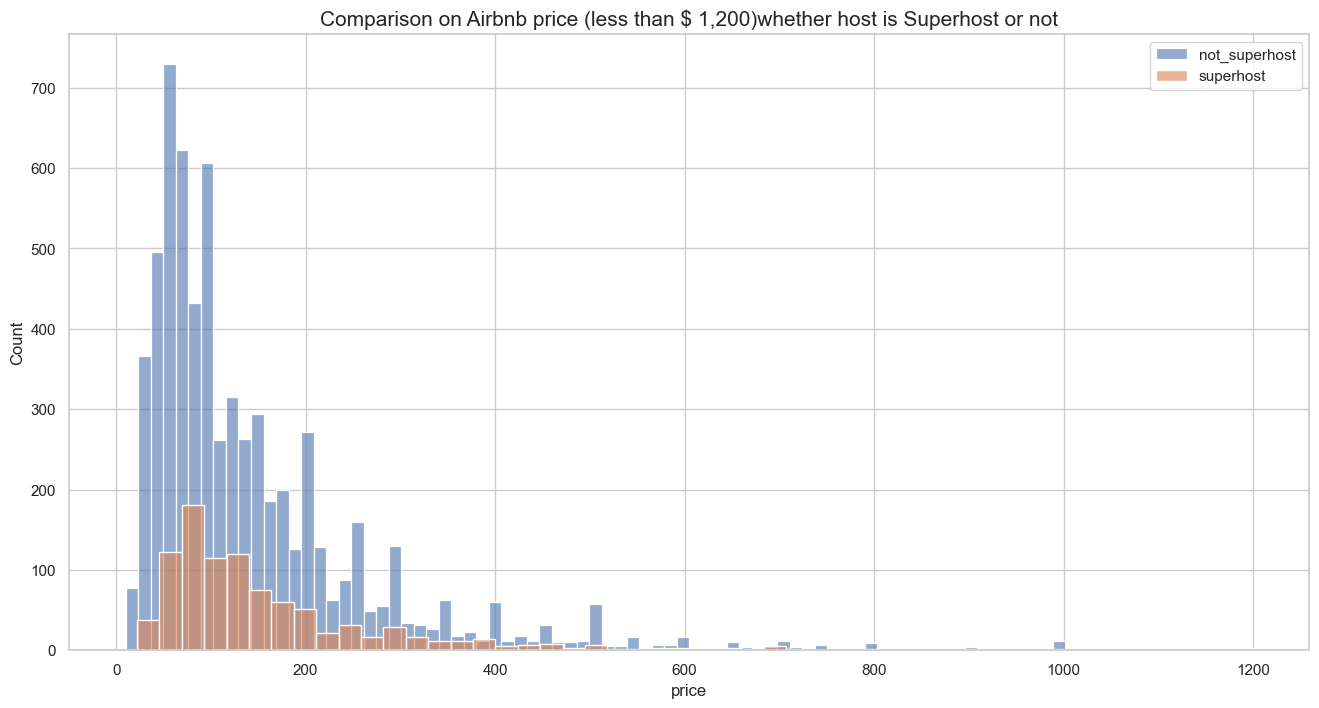

In [25]:
listings.loc[listings['price']>1200, 'price'] = np.nan

fig = plt.figure(figsize=(16,8))
sns.histplot(data =listings[listings['host_is_superhost'] =='f'] ,  x = 'price' ,label = 'not_superhost' ,alpha = 0.6)
sns.histplot(data =listings[listings['host_is_superhost'] =='t'] ,  x = 'price'  ,label = 'superhost' ,alpha = 0.6)

plt.title('Comparison on Airbnb price (less than $ 1,200)whether host is Superhost or not',size = 15)
plt.legend()
plt.show()

In [26]:
# from sklearn.preprocessing import LabelEncoder

# listings_acomm= listings.groupby('property_type')['room_type'].value_counts()
# listings_acomm

# def transform_columns(column_names, DataFrame):
#     label_encoders = LabelEncoder()
#     for column_name in column_names:
#         if DataFrame[column_name].nunique() < 100:
#             DataFrame[column_name] = label_encoders.fit_transform(DataFrame[column_name])

# # The following columns are categorical
# columns_to_transform = ["property_type", "room_type"]

# #Train
# transform_columns(columns_to_transform, listings)

# print(listings["property_type"])

## **3. What are the most important features tenants rate?**

Features that are rated within the app are overall score, accuracy, cleanliness, check-in, communication and location.Therefore:

* Results vary, but most of ouliers have been detected to be below 3.0 in scores as the gap increase is more noticeable.

* Communication and check-in represent the highest rate scores, which mean values are more than 4.80. This is a strenght from all hosts in Aribnb.

* Overall, review score rating has the highest standard deviation of all features.
``
* Cleanliness represents the features with the lowest mean value, which means it could be a key feature about Airbnb experience. This is an oportunity for all Airbnb registered to improve their service and overall scores.

In [27]:
review_columns = listings[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location']]

review_columns.describe()


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
count,6209.000000,6085.000000,6086.000000,6081.000000,6085.000000,6081.000000
mean,4.603239,4.776713,4.645670,4.828653,4.843747,4.732065
std,0.771441,0.403144,0.529977,0.363138,0.341995,0.352586
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.560000,4.740000,4.520000,4.810000,4.820000,4.630000
50%,4.810000,4.900000,4.820000,4.950000,4.970000,4.820000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


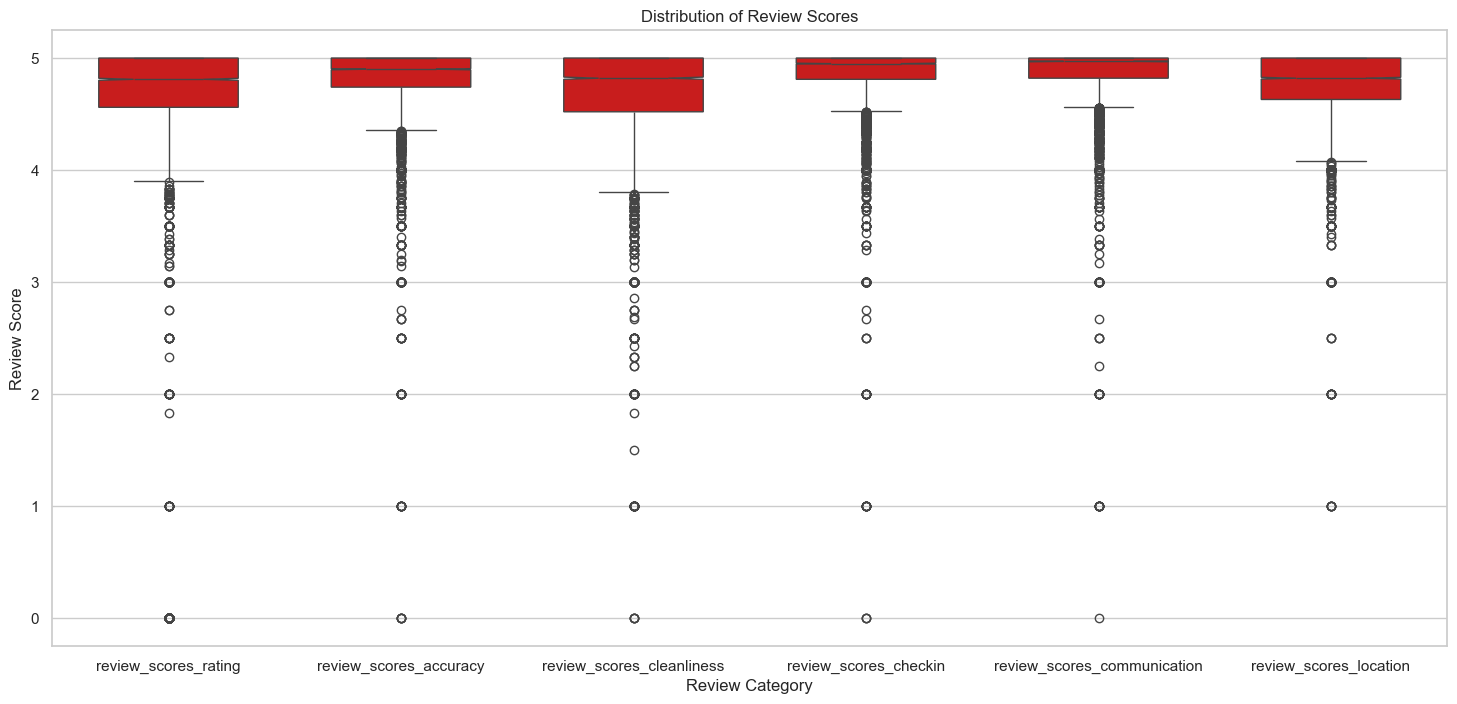

In [28]:
listings_melted = pd.melt(listings, value_vars=review_columns, var_name='Review Category', value_name='Review Score')
sns.set(style="whitegrid")


plt.figure(figsize=(18, 8))
sns.boxplot(x='Review Category', y='Review Score', data=listings_melted, notch=True, color="#E50000", width=0.6)
plt.title("Distribution of Review Scores")
plt.show()


## **4. Score missing**

Review Scores rating is important, but according to the value count, not all the properties have been rated. This could mean there are still properties that have never received a score from tenants or never has been rented.

rating_interval
Excellent    5619
High          369
Poor          133
Medium         72
Low            16
Name: count, dtype: int64


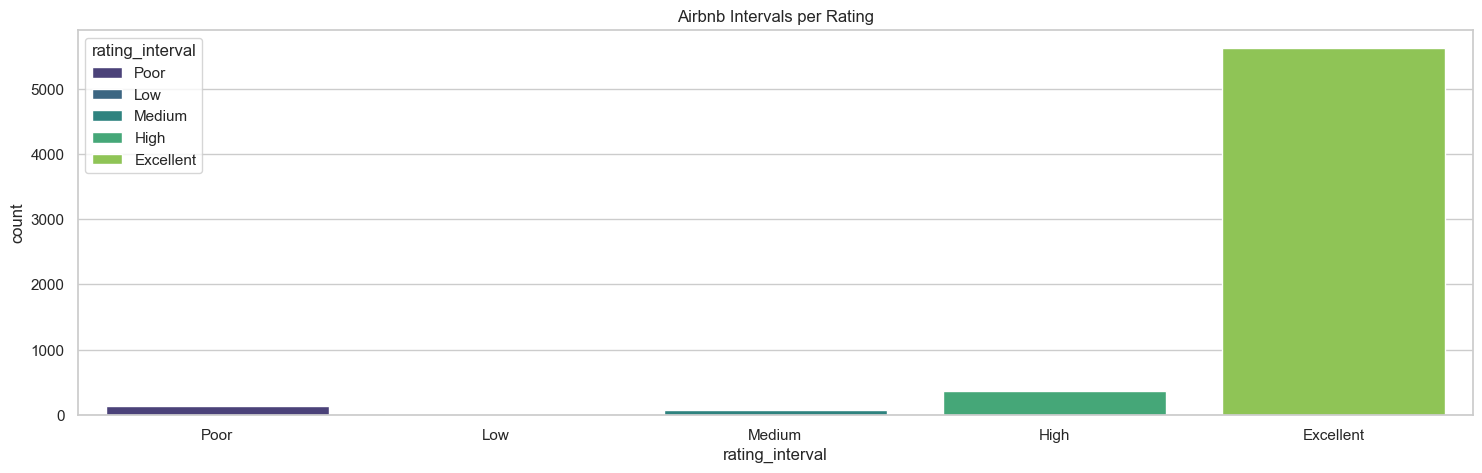

In [29]:
rating_bins = [0,1,2,3,4,5]
rating_labels = ["Poor", "Low", "Medium", "High", "Excellent"]

# Price intervals
listings['rating_interval'] = pd.cut(listings['review_scores_rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)
print(listings['rating_interval'].value_counts())

# Bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
sns.countplot(x='rating_interval', data=listings, hue='rating_interval', palette='viridis', dodge=False)
plt.title("Airbnb Intervals per Rating")
plt.show()

It is necessary to classify the unrated properties, as they represent around 18% of the dataset.

1357 properties have never received a score after guests stayed in.

rating_interval
Excellent    5619
Unrated      1357
High          369
Poor          133
Medium         72
Low            16
Name: count, dtype: int64


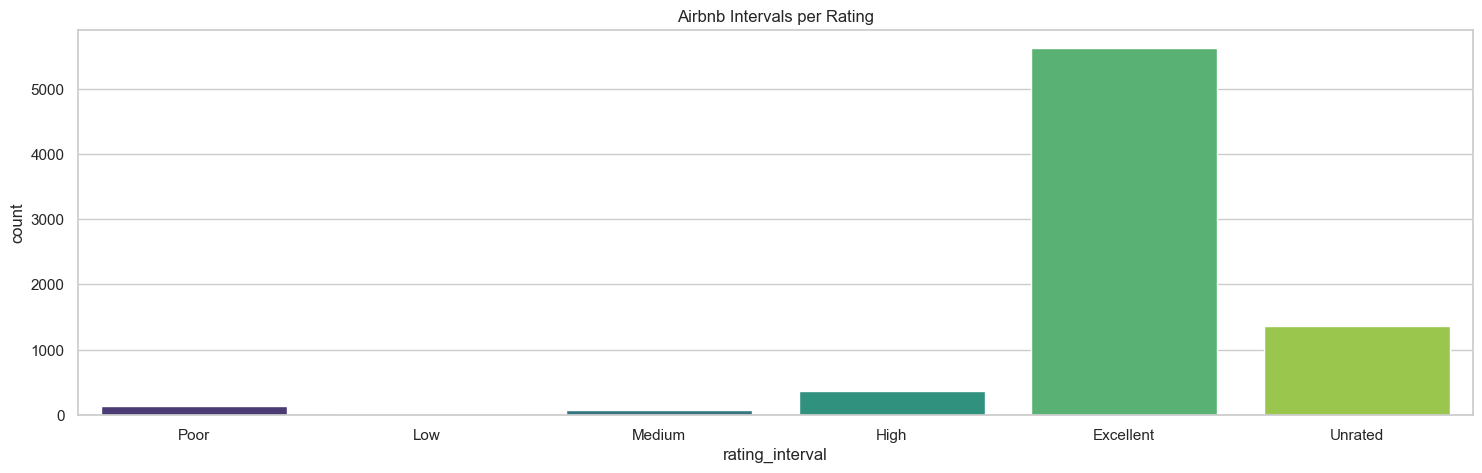

In [30]:
# Bins of airbnb value in USD
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(6)
listings['review_scores_rating']

rating_bins = [0,1,2,3,4,5,6]
rating_labels = ["Poor", "Low", "Medium", "High", "Excellent","Unrated"]

# Price intervals
listings['rating_interval'] = pd.cut(listings['review_scores_rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)
print(listings['rating_interval'].value_counts())

# Bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
sns.countplot(x='rating_interval', data=listings, hue='rating_interval', palette='viridis', dodge=False)
plt.title("Airbnb Intervals per Rating")
plt.show()


## **5. Most common type of property on Airbnb**

1 )  Entire rental unit with  1518 occurances.
2 )  Private room in home with  1457 occurances.
3 )  Private room in rental unit with  1161 occurances.


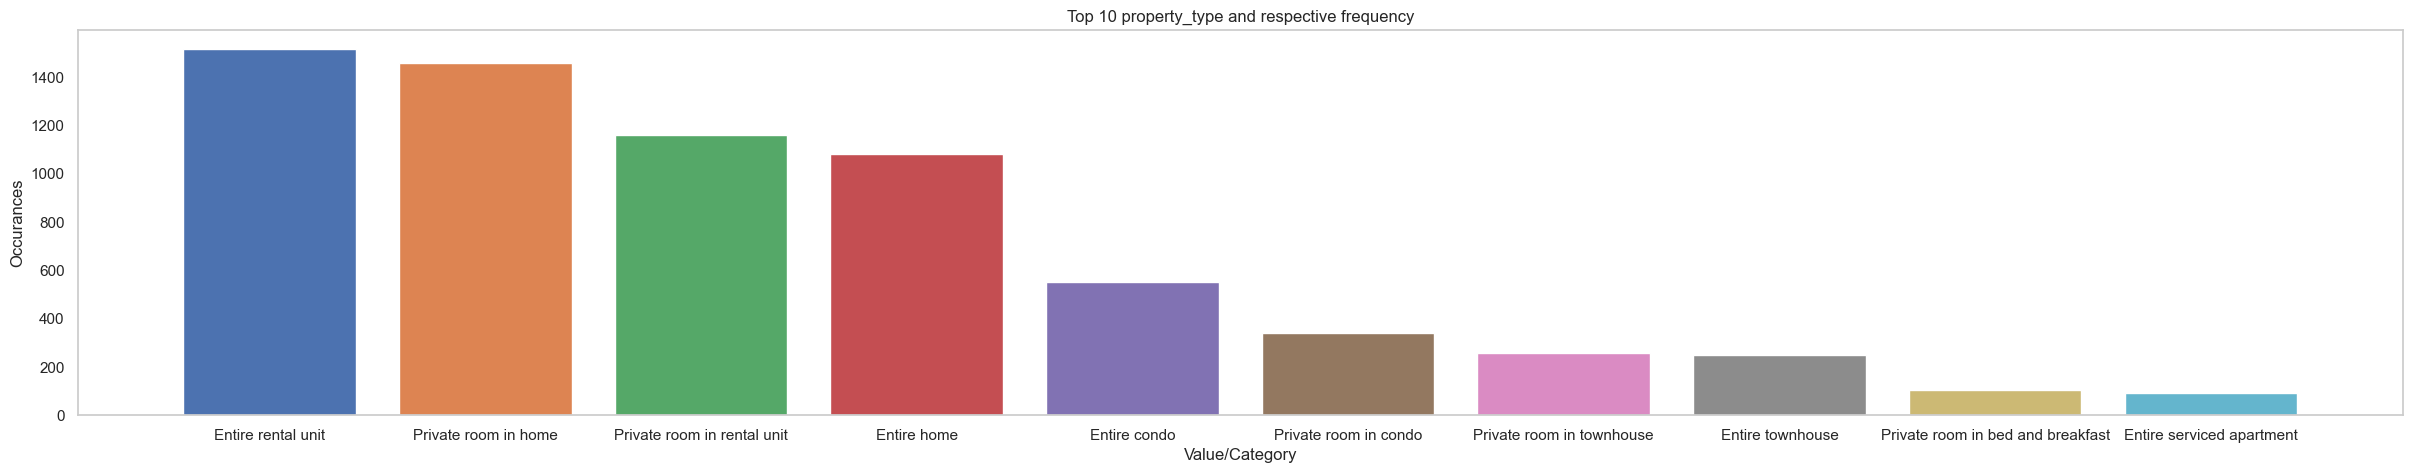

None


In [31]:
def analyze_categorical(data,column_name): #This function will show the occurence of a categorical variable
    funder_occurance={}
    for i in data[column_name]:
        if i in funder_occurance:
            funder_occurance[i]=funder_occurance[i]+1
        else:
            funder_occurance[i]=1
    x=list(funder_occurance.values()) #count of occurences
    y=list(funder_occurance.keys()) # names of the occurrences
    z=np.sort(x)

    random_palette = sns.color_palette(n_colors=10)
    value=[]
    occurance=[]
    
    for i in range(10): #range max of 10 variables
        maxx=np.argmax(x)
        if i<3:
            print(i+1,") ",y[maxx],"with ",x[maxx],"occurances.")
        value.append(str(y[maxx]))
        occurance.append(x[maxx])
        x[maxx]=0

#Bar chart
    plt.figure(figsize=(30,5))
    plt.ylabel("Occurances")
    plt.xlabel("Value/Category")
    plt.bar(value,occurance, color=random_palette)
    plt.title("Top 10 "+str(column_name)+" and respective frequency")
    plt.grid()
    plt.show()

print(analyze_categorical(listings,"property_type"))

* The most common property to rent is "Entire rental unit", which represents the 18.78% of all properties.

* After that, private room in home is the second most common type of property (18.54%), which means while you stay, you will interact and share common areas with the Host. Also, there is a difference made with Private rooms in rental unit, as these properties could not have the host sharing common areas, but you could interact with other guests within the rental unit.

# **PART II. command-line interface program**

## **Data Cleaning for Program**

### **1. Dropping columns**

In [32]:
columns_to_drop = ["description",  "neighborhood_overview", "host_location", "host_about", "neighbourhood",
                   "host_neighbourhood", "neighbourhood_group_cleansed","bathrooms", "calendar_updated",
                    "calendar_updated", "license", "listing_url", "scrape_id", "last_scraped", "source",
                    "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                    "calculated_host_listings_count_shared_rooms"]

listings.drop(columns=columns_to_drop, inplace=True)

### **2. Completing missing data**

In [33]:
missing_values = listings.isnull().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values)

id                                0
name                              0
picture_url                       0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_response_time             3634
host_response_rate             3634
host_acceptance_rate           3375
host_is_superhost                 0
host_thumbnail_url                0
host_picture_url                  0
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    4
bedrooms                        205
beds                             94
amenities                   

In [34]:
# host_response_time
listings['host_response_time'].replace("N/A", "Unknown", inplace=True)
listings['host_response_time'].fillna(value="Unknown", inplace=True)

# host_response_rate
listings['host_response_rate'].replace("N/A", "Unknown", inplace=True)
listings['host_response_rate'].fillna(value="Unknown", inplace=True)

# host_acceptance_rate
listings['host_acceptance_rate'].replace("N/A", "Unknown", inplace=True)
listings['host_acceptance_rate'].fillna(value="Unknown", inplace=True)

# first_review
listings['first_review'].fillna(value="Not rated yet", inplace=True)

# last_review
listings['last_review'].fillna(value="Not rated yet", inplace=True)

# Bathrooms
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("shared baths", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("baths", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("shared bath", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("bath", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("Private half-bath", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("private", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("Shared half-", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("PHalf-", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("Private half-", "")
listings["bathrooms_text"] = listings["bathrooms_text"].str.replace("Half-", "")
listings["bathrooms_text"] = pd.to_numeric(listings["bathrooms_text"])
listings['bathrooms_text'].fillna(value=1, inplace=True)

# Review Scores
listings['review_scores_accuracy'].fillna(value=6, inplace=True)
listings['review_scores_cleanliness'].fillna(value=6, inplace=True)
listings['review_scores_checkin'].fillna(value=6, inplace=True)
listings['review_scores_communication'].fillna(value=6, inplace=True)
listings['review_scores_location'].fillna(value=6, inplace=True)
listings['review_scores_value'].fillna(value=6, inplace=True)
listings['reviews_per_month'].fillna(value=6, inplace=True)

In [35]:
missing_values = listings.isnull().sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values)

id                               0
name                             0
picture_url                      0
host_id                          0
host_url                         0
host_name                        0
host_since                       0
host_response_time               0
host_response_rate               0
host_acceptance_rate             0
host_is_superhost                0
host_thumbnail_url               0
host_picture_url                 0
host_listings_count              0
host_total_listings_count        0
host_verifications               0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                   0
bedrooms                       205
beds                            94
amenities                        0
price               

### **Data after cleaning**

In [36]:
newlistings = listings.dropna()
listings2 = newlistings

In [37]:
listings2

,id,name,picture_url,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_interval,rating_interval
0,4.407700e+04,cosy comfortable Irish cottage twin,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,06/08/2010,within an hour,100%,99%,...,4.83,4.74,4.93,4.93,4.66,4.82,f,1.85,"(60.0, 90.0]",Excellent
1,8.515600e+04,Cosy Comfortable Irish Cottage 1 Double Bed,https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,06/08/2010,within an hour,100%,99%,...,4.86,4.74,4.90,4.88,4.64,4.78,f,1.53,"(60.0, 90.0]",Excellent
2,1.598890e+05,Friendly Single Room,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,01/07/2011,within an hour,100%,95%,...,4.77,4.71,4.86,4.90,4.63,4.74,f,2.78,"(30.0, 60.0]",Excellent
3,1.628090e+05,5.5 miles south of Dublin City :^),https://a0.muscache.com/pictures/86694529/c07b...,777681,https://www.airbnb.com/users/show/777681,Robbie,04/07/2011,within an hour,92%,87%,...,4.88,4.85,4.95,4.97,4.77,4.85,f,3.68,"(60.0, 90.0]",Excellent
4,1.658280e+05,Pádraig Pearse apt. Kilmainham,https://a0.muscache.com/pictures/34311419/b3f6...,790601,https://www.airbnb.com/users/show/790601,Grainne,07/07/2011,within an hour,100%,91%,...,4.89,4.69,4.81,4.75,4.34,4.55,t,0.48,"(250.0, 300.0]",Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,7.129090e+17,Comfortable double room with private bathroom,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,https://www.airbnb.com/users/show/38652370,Gillian,16/07/2015,Unknown,Unknown,Unknown,...,6.00,6.00,6.00,6.00,6.00,6.00,f,6.00,"(180.0, 250.0]",Unrated
7562,7.129140e+17,Welcome 1-bedroom available. Free parking & Wi-Fi,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,https://www.airbnb.com/users/show/89156390,Teresa,10/08/2016,within an hour,100%,23%,...,6.00,6.00,6.00,6.00,6.00,6.00,f,6.00,"(30.0, 60.0]",Unrated
7563,7.129140e+17,Cheerful 5-bedroom Home Friendly Irish Welcome,https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,https://www.airbnb.com/users/show/128213034,Patricia,30/04/2017,within a few hours,100%,25%,...,6.00,6.00,6.00,6.00,6.00,6.00,t,6.00,"(60.0, 90.0]",Unrated
7564,7.129660e+17,Double Bedroom in Private Home,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,https://www.airbnb.com/users/show/256847071,Sorcha,19/04/2019,Unknown,Unknown,Unknown,...,6.00,6.00,6.00,6.00,6.00,6.00,t,6.00,"(180.0, 250.0]",Unrated
